### Анастасия Костяницына БКЛ-151

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import cross_val_score

#### Making data

In [4]:
def func(x, k, b):
    return k*x + b

In [5]:
k = 10
X = []
y = []

for i in range(1, k + 1):
    
    X.append([i, func(i, 8, 10)])
    y.append(1)
    X.append([i + 1, func(i, 8, 10)])
    y.append(0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data

In [6]:
def my_plot(x_train, y_train, x_test):
    plt.plot([item[0] for index, item in enumerate(x_train) if y_train[index] == 1],
         [item[1] for index, item in enumerate(x_train) if y_train[index] == 1], 
         'o', label='type 1')
    plt.plot([item[0] for index, item in enumerate(x_train) if y_train[index] == 0],
         [item[1] for index, item in enumerate(x_train) if y_train[index] == 0], 
         'o', label='type 2')
    plt.plot([item[0] for item in x_test], [item[1] for item in x_test], 'o', label='test')
    plt.legend()
    plt.show()

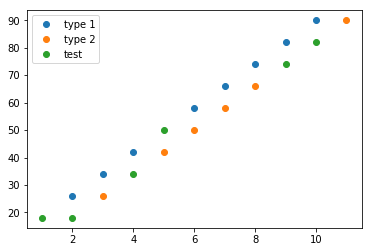

In [7]:
my_plot(x_train, y_train, x_test)

## KNN

In [8]:
def knn(x_train, y_train, x_test, y_test, p=2, metric='minkowski'):
    clf_k = KNeighborsClassifier(n_neighbors=3, p=p, metric=metric)
    clf_k.fit(x_train, y_train) 
    res = clf_k.predict(x_test)
    acc = clf_k.score(x_test, y_test)
    return clf_k, res, acc

In [9]:
clf = knn(x_train, y_train, x_test, y_test)
clf[1]

array([1, 1, 1, 1, 0, 1])

In [10]:
print('accuracy: ' + str(clf[2]))

accuracy: 0.16666666666666666


In [13]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X, y, cv=5))))

mean CV score: 0.2


## LogisticRegression

In [14]:
def logreg(x_train, y_train, x_test, y_test):
    clf_r = LogisticRegression()
    clf_r.fit(x_train, y_train) 
    res = clf_r.predict(x_test)
    acc = clf_r.score(x_test, y_test)
    return clf_r, res, acc

In [15]:
clf = logreg(x_train, y_train, x_test, y_test)
clf[1]

array([1, 0, 0, 0, 1, 0])

In [16]:
print('accuracy: ' + str(clf[2]))

accuracy: 1.0


In [17]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X, y, cv=5))))

mean CV score: 1.0


Метод близжайших соседей показывает себя плохо на данном примере, так как расстояние от тестовой точки до представителя его класса больше, чем до представителя другого класса, поэтому происходит неверная классификация (при поиске соседей в радиус поиска попадают представители другого класса). При этом линейный классификатор с легкостью строит разделяющую поверхность.

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

In [18]:
X_c, y_c = make_circles(n_samples=100, noise=0.05)

In [19]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, 
                                                            test_size=0.3,
                                                            random_state=42)

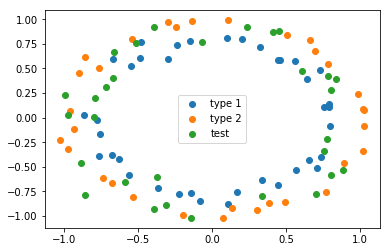

In [20]:
my_plot(x_train_c, y_train_c, x_test_c)

## KNN

In [21]:
clf = knn(x_train_c, y_train_c, x_test_c, y_test_c)
clf[1]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1])

In [22]:
print('accuracy: ' + str(clf[2]))

accuracy: 0.6333333333333333


In [23]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X_c, y_c, cv=5))))

mean CV score: 0.76


## LogisticRegression

In [24]:
clf = logreg(x_train_c, y_train_c, x_test_c, y_test_c)
clf[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
print('accuracy: ' + str(clf[2]))

accuracy: 0.4


In [26]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X_c, y_c, cv=5))))

mean CV score: 0.42000000000000004


Здесь данные линейно неразделимы, поэтому линейному классификатору сложно построить разделюящую плоскость. Можно использовать полиномиальные признаки для того, чтобы линейный классификатор мог строить нелинейные разделяющие поверхности.

### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

In [27]:
from scipy import spatial

Используем датасет из первого задания

## KNN + косинусная близость

In [28]:
clf = knn(x_train, y_train, x_test, y_test, metric=spatial.distance.cosine)
clf[1]

array([1, 0, 0, 1, 1, 0])

In [29]:
print('accuracy: ' + str(clf[2]))

accuracy: 0.8333333333333334


In [30]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X, y, cv=5))))

mean CV score: 0.9


## KNN + евклидово расстояние

In [31]:
clf = knn(x_train, y_train, x_test, y_test, metric='euclidean')
clf[1]

array([1, 1, 1, 1, 0, 1])

In [32]:
print('accuracy: ' + str(clf[2]))

accuracy: 0.16666666666666666


In [33]:
print('mean CV score: ' + str(np.mean(cross_val_score(clf[0], X, y, cv=5))))

mean CV score: 0.2


Косинусная близость смотрит на угол межу двумя точками, так как данные лежат на одной прямой, угол между представителями одного класса меньше, чем между разными. В данном случае величина векторов не имеет значения, так как векторы объектов схожи. Примером такого типа данных могут быть тексты. Например, у нас есть корпус текстов разной длины. На косинусную близость длина не влияет, поэтому схожие тексты классицируются одинаково. 

### Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

In [55]:
X_r, y_r = make_regression(n_samples=100, n_features=1, noise=20)

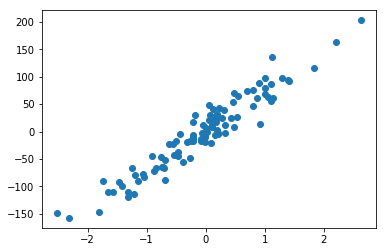

In [56]:
plt.scatter(X_r, y_r)
plt.show()

In [57]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.3,
                                                            random_state=42)

### DecisionTreeRegressor

In [58]:
tree = DecisionTreeRegressor()
tree.fit(x_train_r, y_train_r)
res_t = tree.predict(x_test_r)

In [59]:
res_t

array([ -66.43632279,  -90.2722274 ,   97.75922083,   11.35626108,
        -48.98438541,   -9.49973017, -157.68096741,   -2.16880076,
         -2.16880076,   16.63495744,  -43.9083619 ,   39.84779252,
         87.93604061,   39.84779252,   -9.49973017,   -2.16880076,
        -19.90196071,   26.79786296,   16.63495744,   61.02751799,
        -14.14247865,    8.31781645,  -65.18099868,  -51.67809041,
         94.5671467 ,  -48.98438541,   97.75922083,   39.84779252,
        -90.2722274 ,   -2.16880076])

In [60]:
print('mean CV score: ' + str(np.mean(cross_val_score(tree, X_r, y_r, cv=5))))

mean CV score: 0.7746988748866492


### LinearRegression

In [61]:
lin = LinearRegression()
lin.fit(x_train_r, y_train_r)
res_l = lin.predict(x_test_r)

In [62]:
res_l

array([ -48.50298864,  -73.13834445,   72.20248499,   -2.82453803,
        -18.30336226,  -11.47400318, -177.65919695,   16.41625748,
         15.07932051,   13.3808642 ,  -61.24529537,   20.96076389,
         62.90097091,   24.55132829,  -13.94222453,   15.29964291,
          1.37805368,    6.41684551,   12.18007469,   81.49870459,
         -4.39538673,   35.03666157,  -51.34780245,  -43.18259815,
         92.83986672,  -21.14455985,   72.09561155,   23.73871062,
        -74.25104953,   16.93751491])

In [63]:
print('mean CV score: ' + str(np.mean(cross_val_score(lin, X_r, y_r, cv=5))))

mean CV score: 0.9023185153111986


Линейные модели показывают себя лучше на линейных данных (как в нашем случае). LinearRegression строит линейную границу, а DecisionTreeRegressor пытается поделить данные на части.

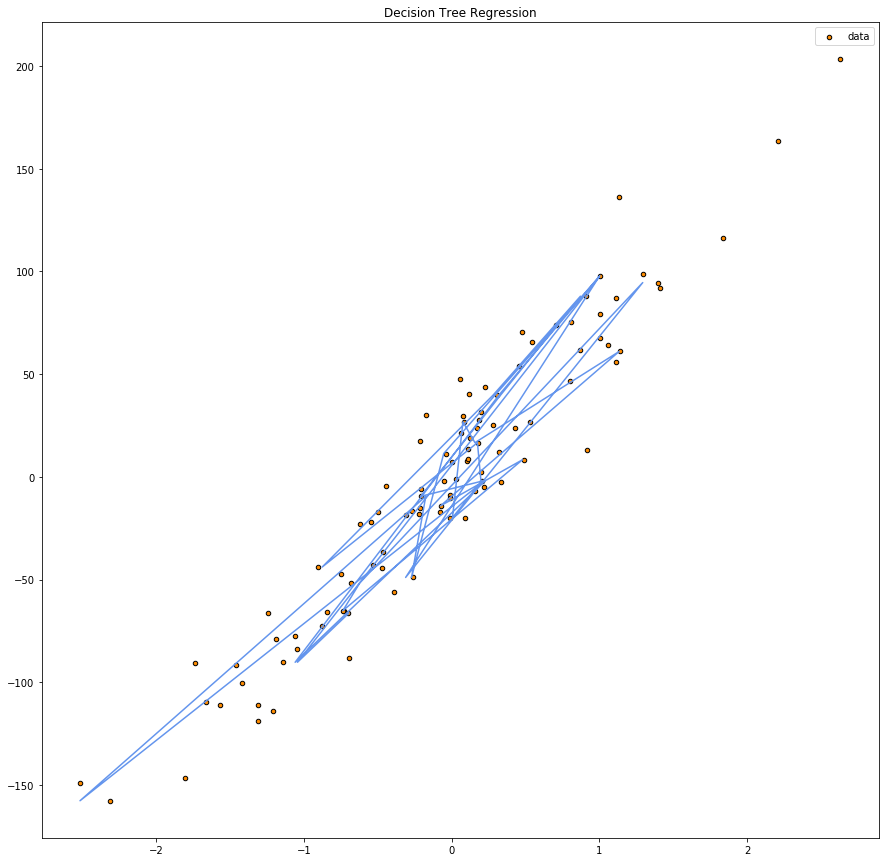

In [64]:
# Plot the results
plt.figure(figsize=(15, 15))
plt.scatter(X_r, y_r, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(x_test_r, res_t, color="cornflowerblue")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

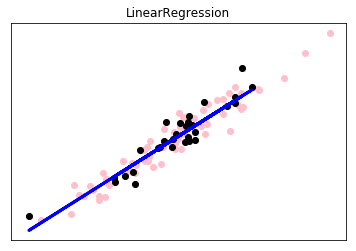

In [65]:
plt.scatter(X_r, y_r,  color='pink')
plt.scatter(x_test_r, y_test_r,  color='black')
plt.plot(x_test_r, res_l, color='blue', linewidth=3)
plt.title("LinearRegression")
plt.xticks(())
plt.yticks(())

plt.show()